In [118]:
import pandas as pd

import seaborn as sns

In [31]:
!ls ../logs/aug/cnn

cnn_i_1_latent_0.025.csv cnn_i_2_latent_0.1.csv   cnn_i_4_latent_0.025.csv
cnn_i_1_latent_0.05.csv  cnn_i_2_latent_0.2.csv   cnn_i_4_latent_0.05.csv
cnn_i_1_latent_0.1.csv   cnn_i_3_latent_0.025.csv cnn_i_4_latent_0.1.csv
cnn_i_1_latent_0.2.csv   cnn_i_3_latent_0.05.csv  cnn_i_4_latent_0.2.csv
cnn_i_2_latent_0.025.csv cnn_i_3_latent_0.1.csv
cnn_i_2_latent_0.05.csv  cnn_i_3_latent_0.2.csv


<Axes: >

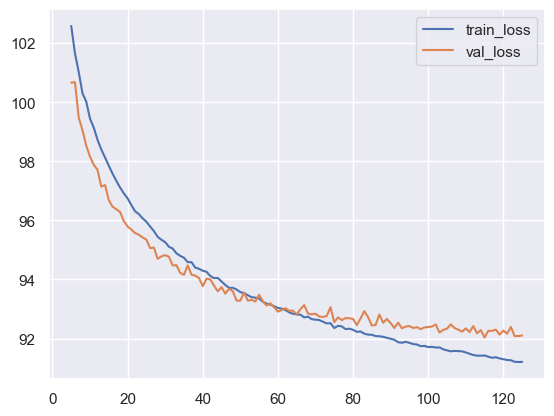

In [136]:
pd.read_csv("../logs/aug/cnn/cnn_i_4_latent_0.2.csv").loc[:, [ 'train_loss', 'val_loss']].iloc[5:].plot()

In [135]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/aug/cnn/*.csv"):
    # print(x)
    latent_factor = float(x.split("latent_")[1].split('.csv')[0])
    print(latent_factor)
    i = float(x.split("i_")[1].split('_latent')[0])
    # print(i)

    df = pd.read_csv(x).iloc[-1]


    train_loss[(latent_factor, int(16*i))] = df.train_loss
    val_loss[(latent_factor, int(16*i))] = df.val_loss

df = pd.DataFrame({'train_loss': pd.Series(train_loss), 'val_loss': pd.Series(val_loss)}).sort_index(axis=0).sort_index(axis=1).loc[:, 'train_loss']

df.unstack()

0.1
0.2
0.025
0.05
0.1
0.2
0.1
0.025
0.2
0.2
0.1
0.05
0.025
0.025
0.05
0.05


,16,32,48,64
0.025,95.297382,92.759767,91.542006,91.156520
0.050,95.608564,92.816475,91.571245,92.471938
0.100,95.448014,93.120905,92.017829,91.602785
0.200,95.894320,92.933962,92.288791,91.208399


In [98]:
!ls ../logs/aug/new_start_base
import glob

batch_norm_False.csv               layers_3_geo_flat_latent_0.025.csv
batch_norm_True.csv                layers_3_geo_flat_latent_0.05.csv
batch_size_1024.csv                layers_3_geo_flat_latent_0.1.csv
batch_size_128.csv                 layers_3_geo_flat_latent_0.2.csv
batch_size_2048.csv                layers_3_geo_geo.csv
batch_size_256.csv                 layers_3_geo_geo_latent_0.025.csv
batch_size_4096.csv                layers_3_geo_geo_latent_0.05.csv
batch_size_512.csv                 layers_3_geo_geo_latent_0.1.csv
batch_size_64.csv                  layers_3_geo_geo_latent_0.2.csv
drop_out_std_0.0.csv               layers_4_geo_flat.csv
drop_out_std_0.1.csv               layers_4_geo_flat_latent_0.025.csv
drop_out_std_0.2.csv               layers_4_geo_flat_latent_0.05.csv
drop_out_std_0.3.csv               layers_4_geo_flat_latent_0.1.csv
drop_out_std_0.4.csv               layers_4_geo_flat_latent_0.2.csv
drop_out_std_0.5.csv               layers_4_geo_geo.csv
drop_out_v

In [115]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/aug/new_start_base/layers_*latent*.csv"):
    # print(x)
    latent_factor = float(x.split("latent_")[1].split('.csv')[0])
    n_layers = int(x.split('layers_')[1].split('_')[0]) - 1
    geo = x.split('/')[-1].split('_')[3].split('_')[0]
    df = pd.read_csv(x).iloc[-1]

    train_loss[(geo, n_layers, latent_factor)] = df.train_loss
    val_loss[(geo, n_layers, latent_factor)] = df.val_loss

df = pd.DataFrame({'train_loss': pd.Series(train_loss), 'val_loss': pd.Series(val_loss)}).sort_index(axis=0).sort_index(axis=1)
df.columns.name = 'metric'
df.index.names = ['geometry', 'n layers', 'latent factor']
df = df.unstack('latent factor').loc[:, 'train_loss']

output = df.sort_index(axis=0).sort_index(axis=1)
output

latent factor           0.025       0.050       0.100       0.200
geometry n layers                                                
flat     1          99.807106  100.480297  100.402948  100.597085
         2          95.020544   95.786396   94.757694   95.666391
         3          93.044667   94.227868   92.580026   92.942346
         4          96.052614   95.966020   93.608009   92.912639
geo      1         101.607609  101.589012  101.786489  101.918818
         2          96.422280   96.631558   96.428265   96.288839
         3          93.816316   94.333568   93.835394   93.833614
         4          93.847609   94.577634   94.605043   94.064630

In [117]:

latex_code = output.to_latex(escape=False, multicolumn=True, multirow=True)
print(latex_code)

\begin{tabular}{llrrrr}
\toprule
 & latent factor & 0.025000 & 0.050000 & 0.100000 & 0.200000 \\
geometry & n layers &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{flat} & 1 & 99.807106 & 100.480297 & 100.402948 & 100.597085 \\
 & 2 & 95.020544 & 95.786396 & 94.757694 & 95.666391 \\
 & 3 & 93.044667 & 94.227868 & 92.580026 & 92.942346 \\
 & 4 & 96.052614 & 95.966020 & 93.608009 & 92.912639 \\
\cline{1-6}
\multirow[t]{4}{*}{geo} & 1 & 101.607609 & 101.589012 & 101.786489 & 101.918818 \\
 & 2 & 96.422280 & 96.631558 & 96.428265 & 96.288839 \\
 & 3 & 93.816316 & 94.333568 & 93.835394 & 93.833614 \\
 & 4 & 93.847609 & 94.577634 & 94.605043 & 94.064630 \\
\cline{1-6}
\bottomrule
\end{tabular}



In [85]:
df

metric                                        train_loss  \
latent_factor                                      0.010   
geometry n_layers                                          
flat     1         \cellcolor[rgb]{0.00,0.41,0.22}105.25   
         2         \cellcolor[rgb]{0.00,0.41,0.22}103.97   
         3          \cellcolor[rgb]{0.07,0.54,0.28}92.68   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}107.76   
         2         \cellcolor[rgb]{0.00,0.41,0.22}107.68   
         3          \cellcolor[rgb]{0.05,0.50,0.26}95.26   

metric                                                   \
latent_factor                                     0.025   
geometry n_layers                                         
flat     1         \cellcolor[rgb]{0.03,0.47,0.25}96.79   
         2         \cellcolor[rgb]{0.08,0.56,0.30}91.64   
         3         \cellcolor[rgb]{0.14,0.62,0.32}88.35   
geo      1         \cellcolor[rgb]{0.00,0.42,0.22}99.47   
         2         \cellcolor[rgb]{0.06,0.52,0.27}93.80   
         3         \cellcolor[rgb]{0.06,0.53,0.28}93.66   

metric                                                    \
latent_factor                                      0.050   
geometry n_layers                                          
flat     1          \cellcolor[rgb]{0.02,0.44,0.23}97.69   
         2          \cellcolor[rgb]{0.08,0.56,0.30}91.77   
         3          \cellcolor[rgb]{0.14,0.62,0.32}88.43   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}100.32   
         2          \cellcolor[rgb]{0.06,0.52,0.27}93.92   
         3          \cellcolor[rgb]{0.05,0.50,0.26}95.29   

metric                                                   \
latent_factor                                     0.100   
geometry n_layers                                         
flat     1         \cellcolor[rgb]{0.02,0.44,0.23}97.89   
         2         \cellcolor[rgb]{0.09,0.58,0.30}90.91   
         3         \cellcolor[rgb]{0.12,0.60,0.32}89.34   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}99.98   
         2         \cellcolor[rgb]{0.07,0.53,0.28}93.10   
         3         \cellcolor[rgb]{0.01,0.43,0.23}98.71   

metric                                                   \
latent_factor                                     0.200   
geometry n_layers                                         
flat     1         \cellcolor[rgb]{0.02,0.44,0.23}97.73   
         2         \cellcolor[rgb]{0.09,0.57,0.30}91.08   
         3         \cellcolor[rgb]{0.08,0.56,0.30}91.45   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}99.79   
         2         \cellcolor[rgb]{0.06,0.52,0.27}93.86   
         3         \cellcolor[rgb]{0.00,0.41,0.22}99.68   

metric                                          val_loss  \
latent_factor                                      0.010   
geometry n_layers                                          
flat     1         \cellcolor[rgb]{0.00,0.41,0.22}108.81   
         2         \cellcolor[rgb]{0.00,0.41,0.22}107.97   
         3         \cellcolor[rgb]{0.00,0.41,0.22}101.91   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}110.14   
         2         \cellcolor[rgb]{0.00,0.41,0.22}109.53   
         3         \cellcolor[rgb]{0.00,0.41,0.22}102.03   

metric                                                    \
latent_factor                                      0.025   
geometry n_layers                                          
flat     1          \cellcolor[rgb]{0.02,0.44,0.23}97.86   
         2          \cellcolor[rgb]{0.05,0.50,0.26}95.15   
         3          \cellcolor[rgb]{0.04,0.49,0.26}95.59   
geo      1          \cellcolor[rgb]{0.00,0.41,0.22}99.69   
         2          \cellcolor[rgb]{0.04,0.47,0.25}96.17   
         3         \cellcolor[rgb]{0.00,0.41,0.22}100.09   

metric                                                    \
latent_factor                                      0.050   
geometry n_layers                                          
flat     1          \cellcolor[rgb]{0.02,0.44,0.23}98.33   


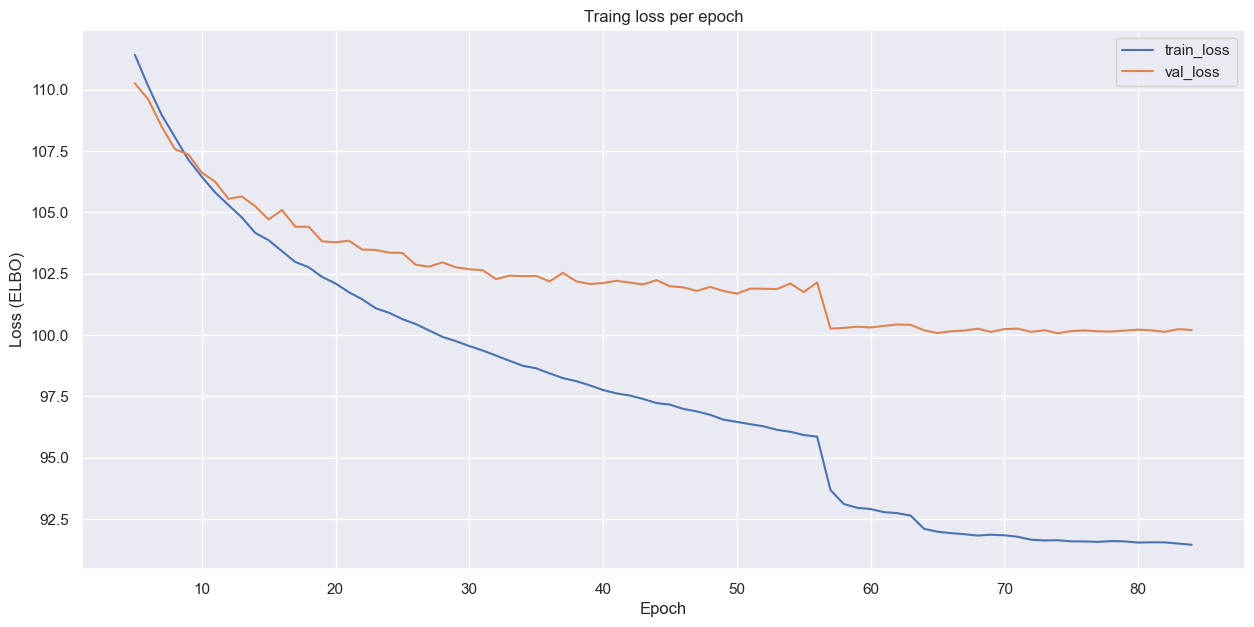

In [124]:
sns.set_theme()

df = pd.read_csv("../logs/aug/base_model/stats_layers-4_geo-flat_latent_f-0.2.csv").loc[:, [ 'train_loss', 'val_loss']].iloc[5:]

ax = df.plot(title='Traing loss per epoch', figsize=(15, 7))

# Add x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (ELBO)')


plt.savefig('flatten_arch_overfitting.pdf')